# Example Pyllelic Use-Case Notebook

## Background

This notebook illustrates the import and use of `pyllelic` in a jupyter environment.

See https://github.com/Paradoxdruid/pyllelic for further details.

## Set-up

In [1]:
import pyllelic

In [2]:
# set up your disk location:
# base_path should be the directory we'll do our work in
# make a sub-directory under base_path with a folder named "test"
# and put the .bam and .bai files in "test"

pyllelic.set_up_env_variables(
    base_path="/Users/abonham/documents/test_allelic/",
    prom_file="TERT-promoter-genomic-sequence.txt",
    prom_start="1293000",
    prom_end="1296000",
    chrom="5",
)

## Main Parsing Functions

In [3]:
files_set = pyllelic.make_list_of_bam_files()  # finds bam files

In [23]:
# Uncomment for debugging:
# files_set

In [6]:
# index bam and creates bam_output folders/files
positions = pyllelic.index_and_fetch(files_set)

In [ ]:
# Only needs to be run once, generates static files
pyllelic.genome_parsing()

In [7]:
cell_types = pyllelic.extract_cell_types(files_set)

In [8]:
# Uncomment for debugging
# cell_types

In [9]:
# Set filename to whatever you want
df_list = pyllelic.run_quma_and_compile_list_of_df(cell_types, "tester5.xlsx") # to skip quma: , run_quma=False)

In [25]:
# Uncomment for debugging
# df_list.keys()

In [11]:
means = pyllelic.process_means(df_list, positions, files_set)

In [12]:
# Uncomment for debugging
# means

In [13]:
modes = pyllelic.process_modes(df_list, positions, files_set)

In [14]:
# Uncomment for debugging
# modes

In [15]:
diff = pyllelic.find_diffs(means, modes)

In [ ]:
# Uncomment for debugging
# diff

## Write Output to excel files

In [18]:
# Set the filename to whatever you want
pyllelic.write_means_modes_diffs(means, modes, diff, "Test5")

## Visualizing Data

In [ ]:
final_data = pyllelic.pd.read_excel(pyllelic.config.base_directory.joinpath("Test5_diff.xlsx"),
        dtype=str,
        index_col=0,
)

In [ ]:
final_data

In [19]:
individual_data = pyllelic.return_individual_data(df_list, positions, files_set)

In [24]:
# Uncomment for debugging
# individual_data

In [22]:
pyllelic.pd.DataFrame(individual_data.loc['SW1710'])

,SW1710
1293588,NaN
1293690,NaN
1293730,NaN
1294031,NaN
1294196,NaN
1294262,NaN
1294316,NaN
1294369,NaN
1294419,NaN
1294872,NaN


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

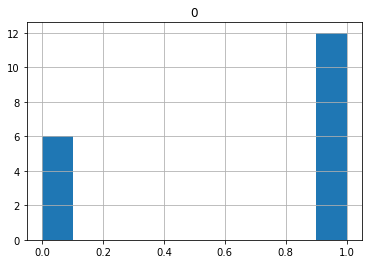

In [21]:
pyllelic.histogram(individual_data, 'SW1710', '1295089')